In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load the dataset
df = pd.read_csv('car_price_prediction.csv')

In [3]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [4]:
df.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [6]:
df.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [7]:
# Drop the 'ID' column as it is not useful for prediction
df.drop('ID', axis=1, inplace=True)

In [8]:
# Replace invalid values and convert types
df['Levy'] = df['Levy'].replace('-', 0).astype('float')
df['Mileage'] = df['Mileage'].str.replace('km', "").astype('float')
df['Engine volume'] = df['Engine volume'].str.replace('Turbo', "").astype('float')

In [9]:
# Print unique counts for each column
for col in df.columns:
    print(f'{col} : {df[col].nunique()}')

Price : 2315
Levy : 559
Manufacturer : 65
Model : 1590
Prod. year : 54
Category : 11
Leather interior : 2
Fuel type : 7
Engine volume : 65
Mileage : 7687
Cylinders : 13
Gear box type : 4
Drive wheels : 3
Doors : 3
Wheel : 2
Color : 16
Airbags : 17



# Visualizations

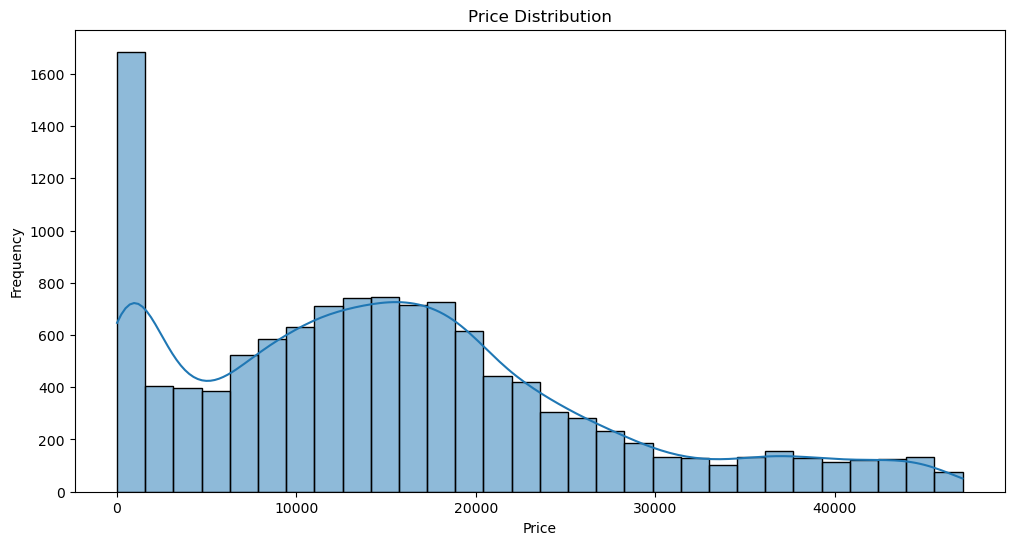

In [20]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

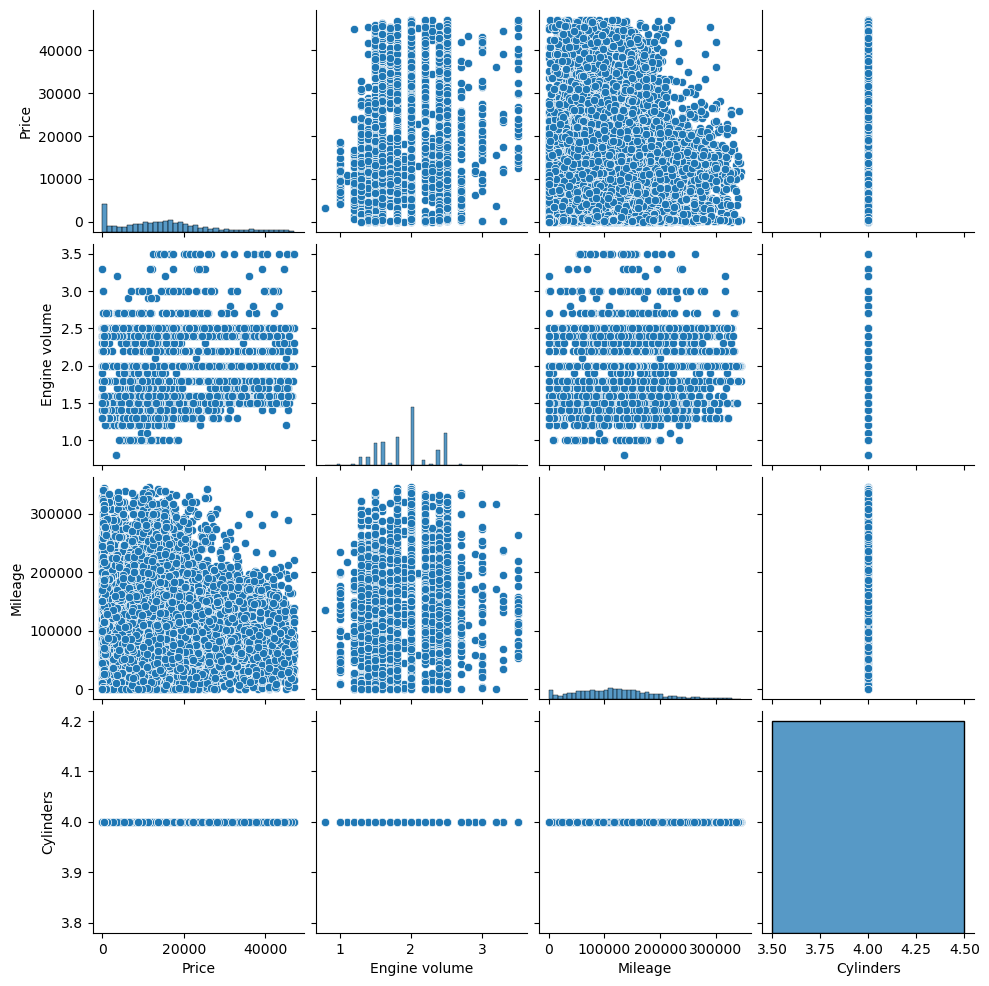

In [21]:
sns.pairplot(df[['Price', 'Engine volume', 'Mileage', 'Cylinders']])
plt.show()

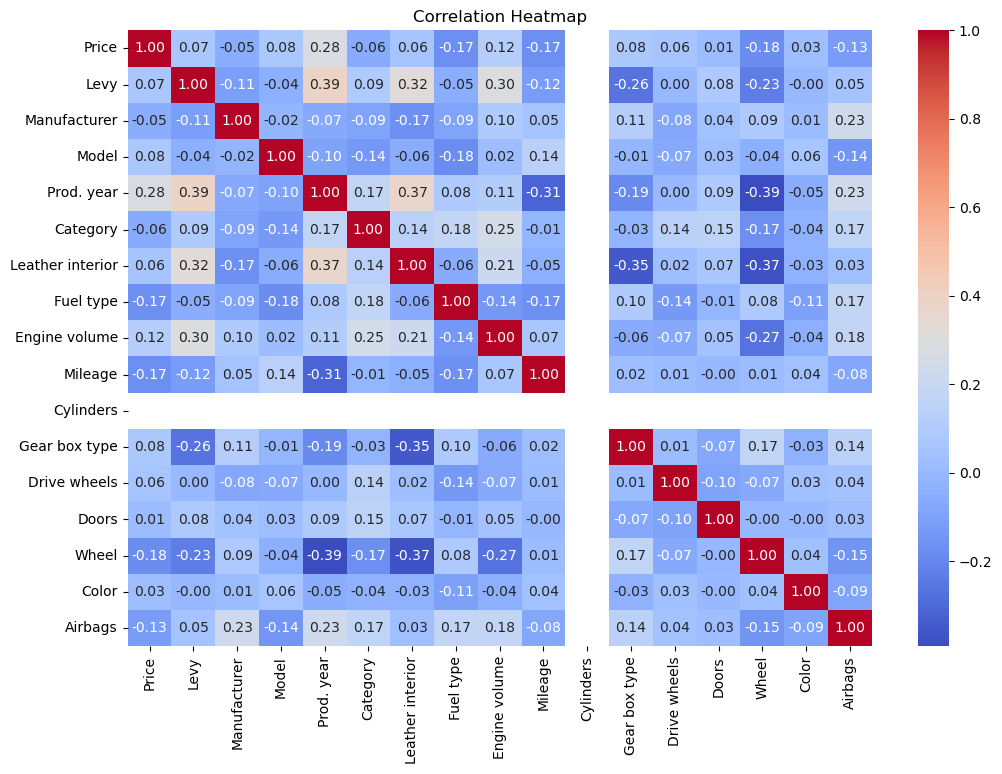

In [22]:
# Correlation heatmap
corr = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

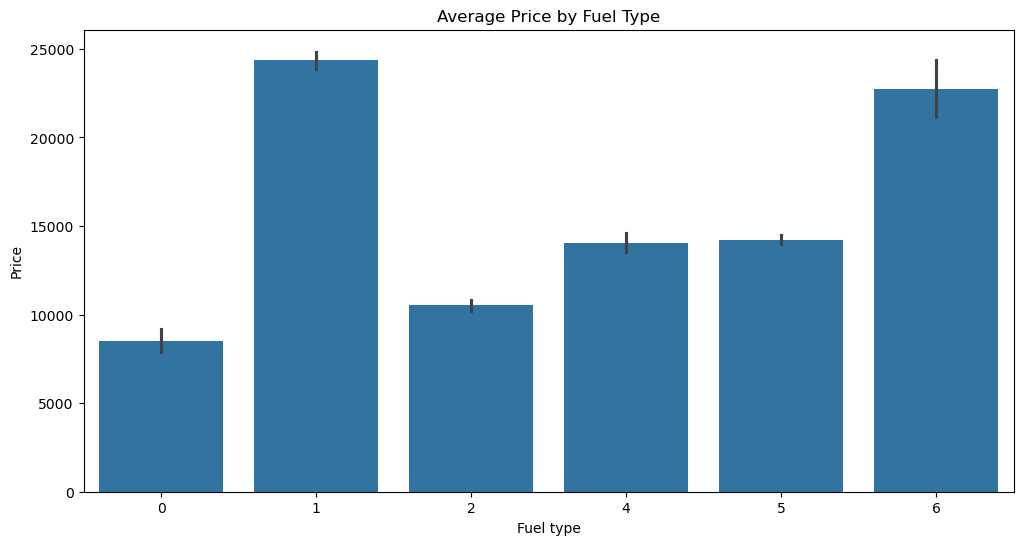

In [23]:
# Average Price by Fuel Type
plt.figure(figsize=(12, 6))
sns.barplot(x='Fuel type', y='Price', data=df)
plt.title('Average Price by Fuel Type')
plt.show()

# Transform Data

In [10]:
# Separate categorical and numerical columns
cat_col = df.select_dtypes(include=['object'])
num_col = df.select_dtypes(exclude=['object'])


In [11]:
# Label encoding for categorical features
le = LabelEncoder()
for col in cat_col.columns:
    df[col] = le.fit_transform(df[col])

In [12]:
# Outlier detection and removal using IQR
for col in num_col.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    total_examples = df[col].shape[0]
    
    print(f'{col} : {outliers} | Percentage : {round(100 * outliers / total_examples, 2)}%')
    
    if outliers > 0:
        df = df.loc[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

Price : 1073 | Percentage : 5.58%
Levy : 162 | Percentage : 0.89%
Prod. year : 1491 | Percentage : 8.28%
Engine volume : 971 | Percentage : 5.88%
Mileage : 632 | Percentage : 4.07%
Cylinders : 2816 | Percentage : 18.89%
Airbags : 0 | Percentage : 0.0%


# Create Model

In [15]:
# Preparing data for modeling
X = df.drop('Price', axis=1)
y = df['Price']

In [16]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
# Ridge Regression
ridge = Ridge(alpha=10)
ridge.fit(X_train, y_train)
ridge_prediction = ridge.predict(X_test)
print("Ridge Regression:")
print(f'Mean Squared Error: {mean_squared_error(y_test, ridge_prediction)}')
print(f'R^2 Score: {r2_score(y_test, ridge_prediction)}')

Ridge Regression:
Mean Squared Error: 97932851.11157593
R^2 Score: 0.2348143237612924


In [18]:
# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso_prediction = lasso.predict(X_test)
print("Lasso Regression:")
print(f'Mean Squared Error: {mean_squared_error(y_test, lasso_prediction)}')
print(f'R^2 Score: {r2_score(y_test, lasso_prediction)}')

Lasso Regression:
Mean Squared Error: 97934021.70734593
R^2 Score: 0.2348051774625204


In [19]:
# Random Forest Regressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_prediction = rf_model.predict(X_test)
print("Random Forest Regressor:")
print(f'Mean Squared Error: {mean_squared_error(y_test, rf_prediction)}')
print(f'R^2 Score: {r2_score(y_test, rf_prediction)}')

Random Forest Regressor:
Mean Squared Error: 27109018.521645628
R^2 Score: 0.7881871870959843


# Result
    Ridge Regression:
      Mean Squared Error (MSE): 97,932,851.11
      R-squared (R²): 0.23
    Lasso Regression:
      Mean Squared Error (MSE): 97,934,021.70
      R-squared (R²): 0.23
    Random Forest Regressor:
      Mean Squared Error (MSE): 27,109,018.52
      R-squared (R²): 0.78